In [42]:
# This notebook is used to test double_dot scripts
%reset
import imp
import dd
import sys
sys.path.append('/Users/sandesh/repos/quantum-ml/nanowire_model')
import physics
import potential_profile
import markov
import exceptions
import thomas_fermi
imp.reload(physics)
imp.reload(potential_profile)
imp.reload(markov)
imp.reload(exceptions)
imp.reload(thomas_fermi)

imp.reload(dd)

import time
st = time.time()
print(dd.calculate_2d_map(100))
print(time.time()-st, "seconds")


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
242.0586280822754
242.143541097641 seconds


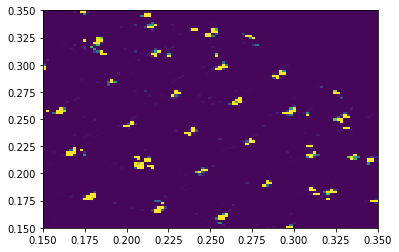

In [41]:
import numpy as np
dat = np.load('/Users/sandesh/data/double_dot_test1.npy').item()

import matplotlib.pyplot as plt
%matplotlib inline

curr_map = np.array([x['current'] for x in dat['output']]).reshape((len(dat['input']['V_d1_vec']),len(dat['input']['V_d2_vec'])))

XX,YY = np.meshgrid(dat['input']['V_d1_vec'],dat['input']['V_d2_vec'])
plt.pcolor(XX,YY,curr_map,vmax=1e-8)


In [ ]:
physics_model = {}
# multiple of eV
physics_model['E_scale'] = 1
# multiple of nm
physics_model['dx_scale'] = 1
physics_model['kT'] = 350e-6

b1 = [-200e-3,-0.6,0.05,1]
d1 = [200e-3,-0.2,0.05,1]
b2 = [-350e-3,0.0,0.05,1]
d2 = [200e-3,0.2,0.05,1]
b3 = [-200e-3,0.6,0.05,1]

x = np.linspace(-1,1,100)
physics_model['x'] = x
physics_model['list_b'] = [b1,d1,b2,d2,b3]
physics_model['V'] = potential_profile.V_x_wire(x,physics_model['list_b'])


physics_model['K_onsite'] = 25e-3
physics_model['sigma'] = x[1] - x[0]
physics_model['x_0'] = 0.1*(x[1] - x[0])
physics_model['mu_l'] = (300.01e-3,300.0e-3)
physics_model['battery_weight'] = 100
physics_model['short_circuit_current'] = 1
physics_model['QPC_current_scale'] = 1e-4
physics_model['t'] = 25e-3

graph_model = (1,1)
tf_strategy = 'simple'

graph = markov.Markov(graph_model,physics_model,tf_strategy)
graph.find_n_dot_estimate()

d1[0] = V_d1_vec[i]
d2[0] = V_d2_vec[j]
physics_model['list_b'] = [b1,d1,b2,d2,b3]
physics_model['V'] = potential_profile.V_x_wire(x,physics_model['list_b'])
output = calculate_current((graph,physics_model))

print(output)